In [28]:
import pandas as pd
import matplotlib.pyplot as plt



In [14]:
crashes = pd.read_csv('/content/drive/MyDrive/csvs/Airplane_Crashes_and_Fatalities_Since_1908.csv')
crashes


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


Evolução ao longo do tempo (1908-2009):


In [18]:
# Converti a coluna de datas para o formato apropriado:
crashes['Date'] = pd.to_datetime(crashes['Date'])


In [19]:
# Extraí o ano das datas dos acidentes:
crashes['Year'] = crashes['Date'].dt.year



In [34]:
# Contei os acidentes por ano:
accidentsPerYear = crashes['Year'].value_counts().sort_index()

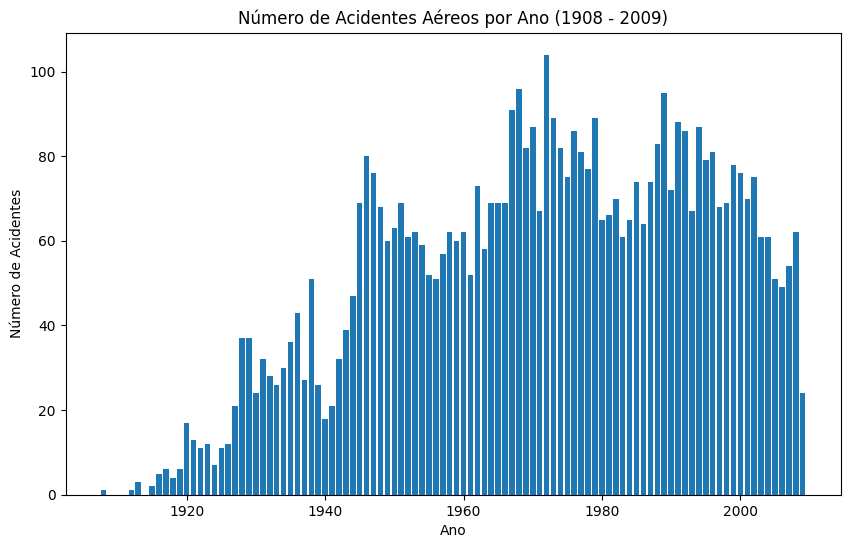

In [36]:
# Visualização de dados:
plt.figure(figsize=(10, 6))
plt.bar(accidentsPerYear.index, accidentsPerYear.values)
plt.xlabel('Ano')
plt.ylabel('Número de Acidentes')
plt.title('Número de Acidentes Aéreos por Ano (1908 - 2009)')
plt.show()


In [39]:
# Qual o ano com o maior número de casos?
peakYear = crashes['Year'].value_counts().idxmax()
peakYear


1972

In [40]:
# Qual o ano com o menor número de casos?
troughYear = crashes['Year'].value_counts().idxmin()
troughYear

1912

Causas de acidentes:

In [41]:
#Causa mais comum:
cause = crashes['Summary'].value_counts().idxmax()
cause


'Crashed during takeoff.'

Consequências e fatalidades:

In [46]:
deathsPerYear = crashes.groupby('Year')['Fatalities'].sum()
deathsPerYear

Year
1908       1.0
1912       5.0
1913      45.0
1915      40.0
1916     108.0
         ...  
2005    1306.0
2006    1136.0
2007     931.0
2008     820.0
2009     581.0
Name: Fatalities, Length: 98, dtype: float64

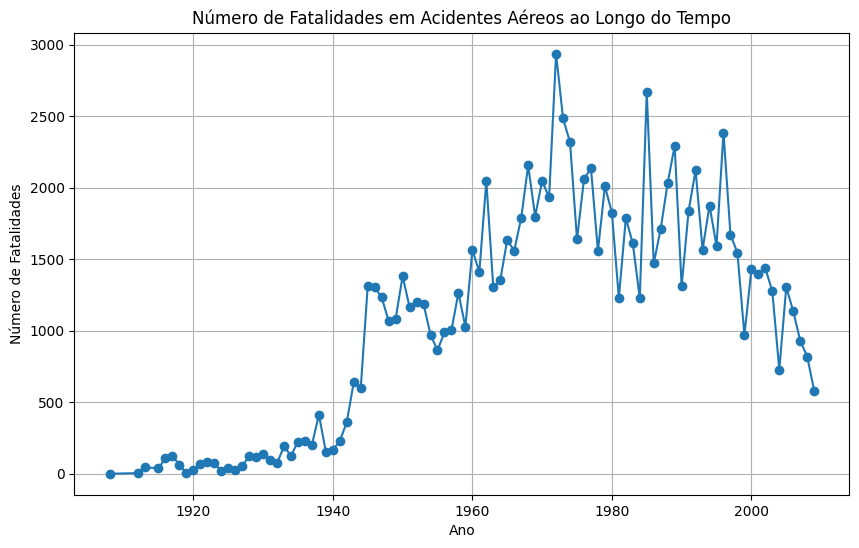

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(deathsPerYear.index, deathsPerYear.values, marker='o')
plt.xlabel('Ano')
plt.ylabel('Número de Fatalidades')
plt.title('Número de Fatalidades em Acidentes Aéreos ao Longo do Tempo')
plt.grid(True)
plt.show()







In [48]:
# Ano pico de fatalidades
deathsPeakYear = deathsPerYear.idxmax()
deathsPeakYear

1972

In [49]:
# Ano vale de fatalidades
deathsTroughYear = deathsPerYear.idxmin()
deathsTroughYear

1908

**Tipos de aeronaves mais envolvidas em acidentes:**


In [55]:

aircraft = crashes.groupby('Type').count()

In [52]:
aircraft = aircraft.sort_values(ascending=False)
top10 = aircraft.head(10)

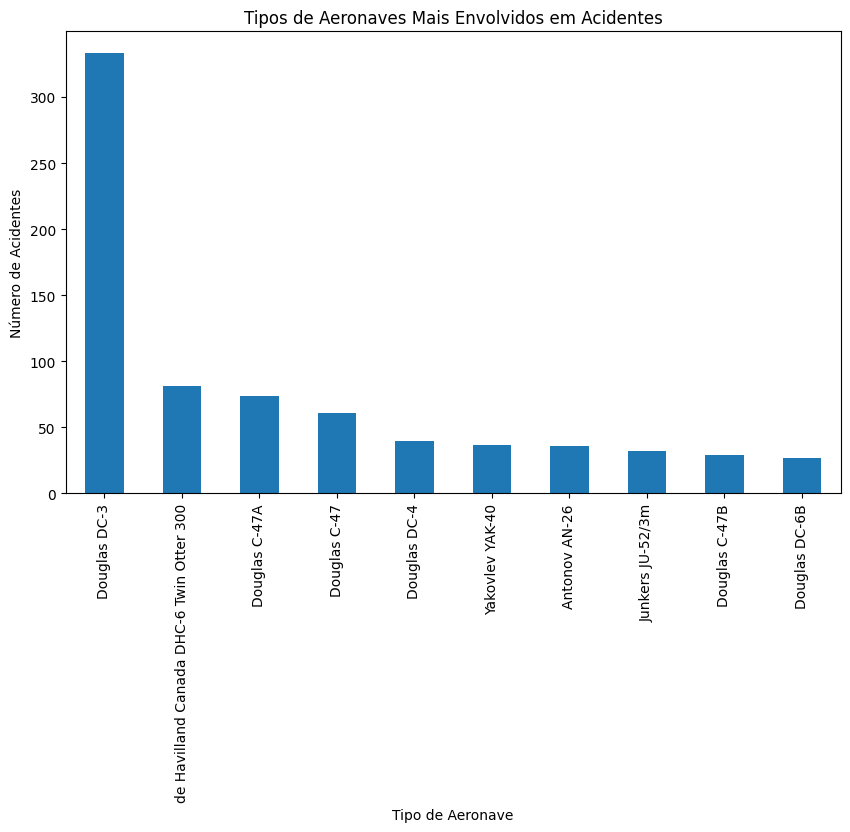

In [54]:
top10.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Número de Acidentes')
plt.title('Tipos de Aeronaves Mais Envolvidos em Acidentes')
plt.show()

**Motivos mais comuns de acidentes:**

In [71]:
top4 = crashes['Summary'].value_counts().head(4)
top4

Crashed during takeoff.     15
Crashed while en route.     12
Crashed into the sea.       12
Crashed into a mountain.    12
Name: Summary, dtype: int64

**Localizações com mais fatalidades**

In [73]:
perLoc = crashes.groupby('Location').count()
perLoc

,Date,Time,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,decade
Location,,,,,,,,,,,,,,
"1,200 miles off Dakar, AtlantiOcean",1,0,1,0,1,1,1,1,1,1,1,1,1,1
"100 miles SW of Kuujjuaq, Quebec, Canada",1,1,1,1,0,1,1,1,1,1,1,1,1,1
"110 miles SW of Sochi, Russia",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"200 miles NE of Derby, Australia",1,1,1,0,0,1,1,1,1,1,1,1,1,1
"25 nm off Agrigento, Italy",1,1,1,1,0,1,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zheng Zou AB, China",1,0,1,0,1,1,1,0,1,1,1,1,1,1
"Zifta, Egypt",1,1,1,0,1,1,1,0,1,1,1,1,1,1
"Zurich, Switzerland",6,3,6,2,4,6,6,6,6,6,6,6,6,6


In [84]:
perLoc = crashes.groupby('Location')['Fatalities'].count()
peakLoc = perLoc.sort_values(ascending=False)
peakLoc

Location
Sao Paulo, Brazil                        15
Moscow, Russia                           15
Rio de Janeiro, Brazil                   14
Bogota, Colombia                         13
Manila, Philippines                      13
                                         ..
Between Chungking and Shanghai, China     0
Kupang, Timor                             0
Near Samarinda, Borneo                    0
Nanking, China                            0
Herreira, Spain                           0
Name: Fatalities, Length: 4303, dtype: int64

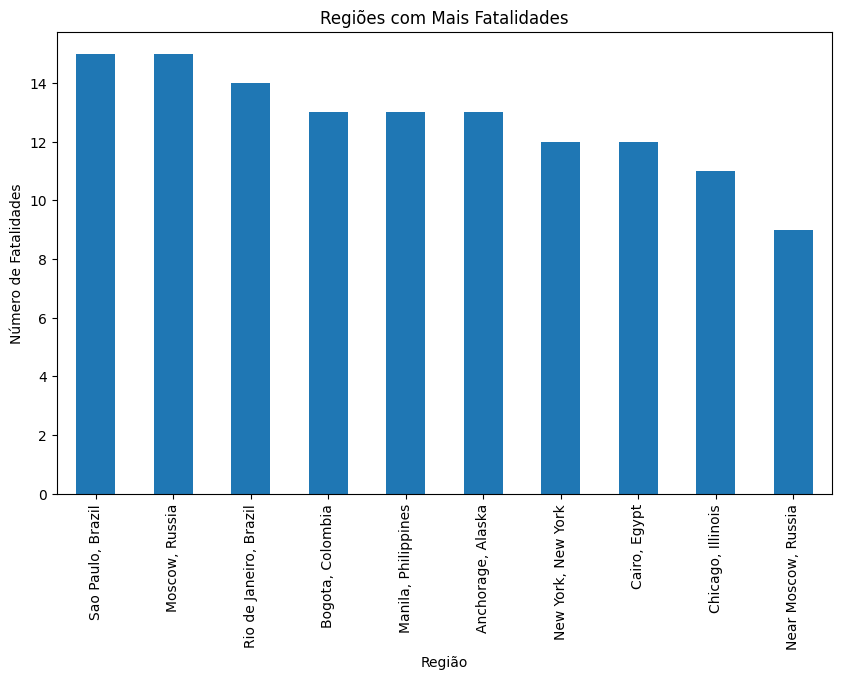

In [85]:

top_regioes = peakLoc.head(10)  # Top 10 regiões com mais fatalidades

top_regioes.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Região')
plt.ylabel('Número de Fatalidades')
plt.title('Regiões com Mais Fatalidades')
plt.show()
